In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp

In [2]:
#Como trabajamos con Visual, esta línea imprime los gráficos
%matplotlib inline

In [3]:
df = pd.read_csv("../data/Data_limpia.csv")
df.columns

Index(['company', 'title', 'totalyearlycompensation', 'location',
       'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'Race', 'Education'],
      dtype='object')

Análisis exploratorio de datos (EDA)

In [ ]:
#profile = pp.ProfileReport(df, title='Pandas Profiling Report', minimal=True)
#profile.to_file('../data/reports/Data_salary.html')

Preguntas de exploración
1.¿Qué variables influyen en el valor facturado por los profesionales?
Salario anual de acuerdo a:
*Nivel de educación
*Género
*Empresa
*Experiencia
¿Qué variables influyen y en qué % la participación de estos profesionales?

In [54]:
df_1 = df.groupby("Education").agg({"totalyearlycompensation":"mean"})
df_1

,totalyearlycompensation
Education,
Bachelor's Degree,165376.822524
Highschool,173090.000000
Master's Degree,204125.052250
No especificado,206215.082321
PhD,258606.382979
Some College,187184.713376


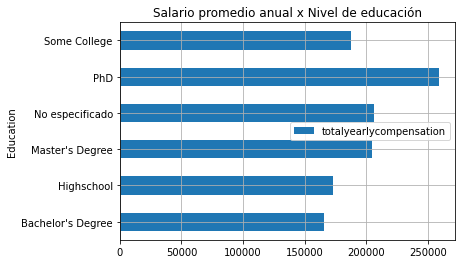

In [55]:
df_1.plot.barh(title="Salario promedio anual x Nivel de educación").grid()

In [56]:
df_2 = df.groupby("gender").agg({"totalyearlycompensation":"mean"})
df_2#.plot(kind="pie")

,totalyearlycompensation
gender,
Female,186004.488330
Male,194675.540095
No especificado,209690.642303
Other,210198.924731


In [57]:
df_3 = df.groupby('company').agg({"totalyearlycompensation":"mean"})
df_3.shape

(1617, 1)

In [ ]:
#for i in df_3.T:
#    print(i)

In [58]:
df_3.loc[['Google','IBM','ibm','google']]

,totalyearlycompensation
company,
Google,258332.175639
IBM,128687.732342
ibm,108500.000000
google,230793.103448


In [29]:
#Normalizamos los datos de texto de la columna company
normtext_company = df['company'].str.title()
print(normtext_company)

0            Oracle
1              Ebay
2            Amazon
3             Apple
4         Microsoft
            ...    
58357        Google
58358     Microsoft
58359          Msft
58360    Salesforce
58361         Apple
Name: company, Length: 58362, dtype: object


In [32]:
data = pd.concat([df['totalyearlycompensation'],normtext_company], axis=1)
data

,totalyearlycompensation,company
0,127000,Oracle
1,100000,Ebay
2,310000,Amazon
3,372000,Apple
4,157000,Microsoft
...,...,...
58357,327000,Google
58358,237000,Microsoft
58359,220000,Msft
58360,280000,Salesforce


<AxesSubplot:xlabel='company'>

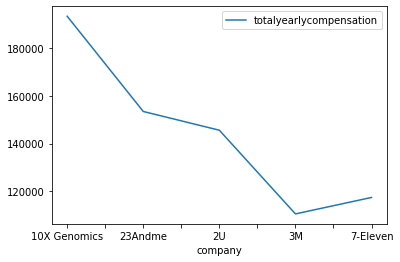

In [38]:
#Se agrupa por compañía
x_compania = data.groupby([normtext_company]).mean()
x_compania.head().plot()